In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from geneview.algorithm import hierarchical_cluster

## A simple examples

<AxesSubplot:>

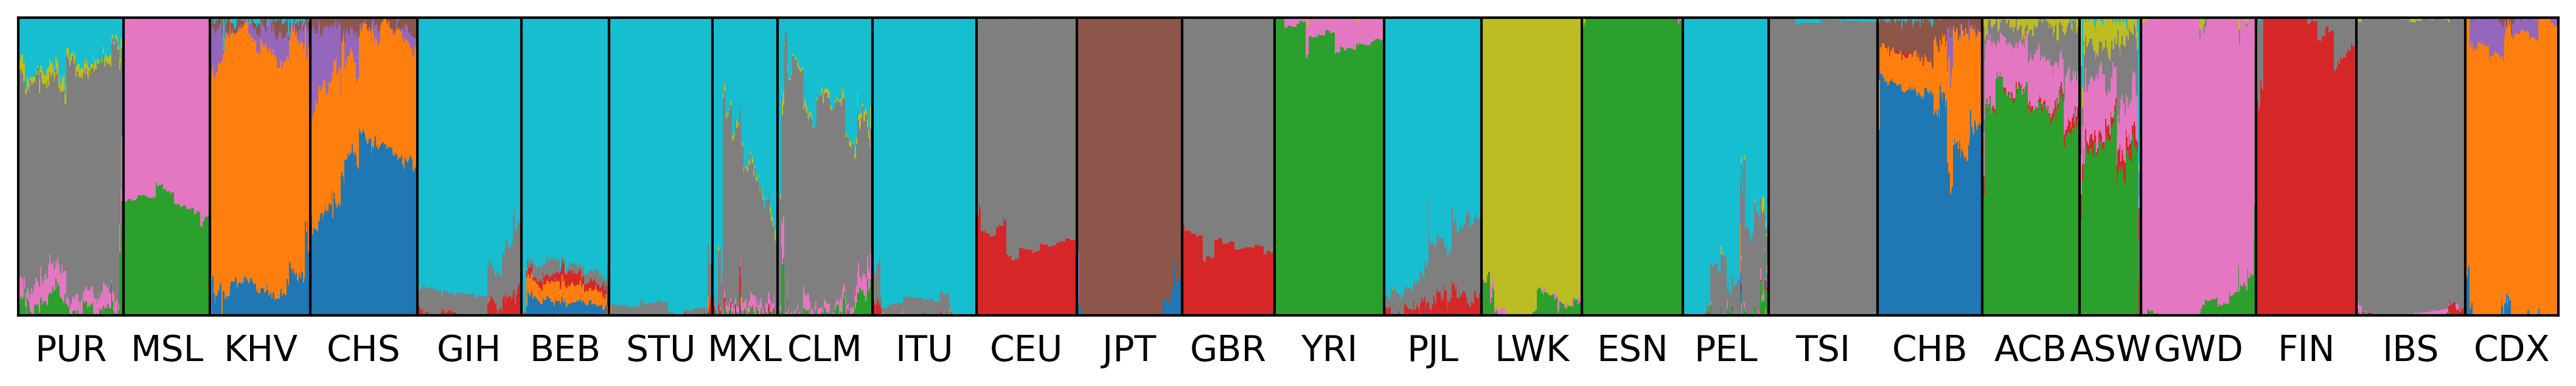

In [6]:
f, ax = plt.subplots(1, 1, figsize=(14, 2), facecolor="w", constrained_layout=True, dpi=300)
admixtureplot(data="../../examples/data/admixture.output.Q", 
              population_info="../../examples/data/admixture_population.info",
              ax=ax)

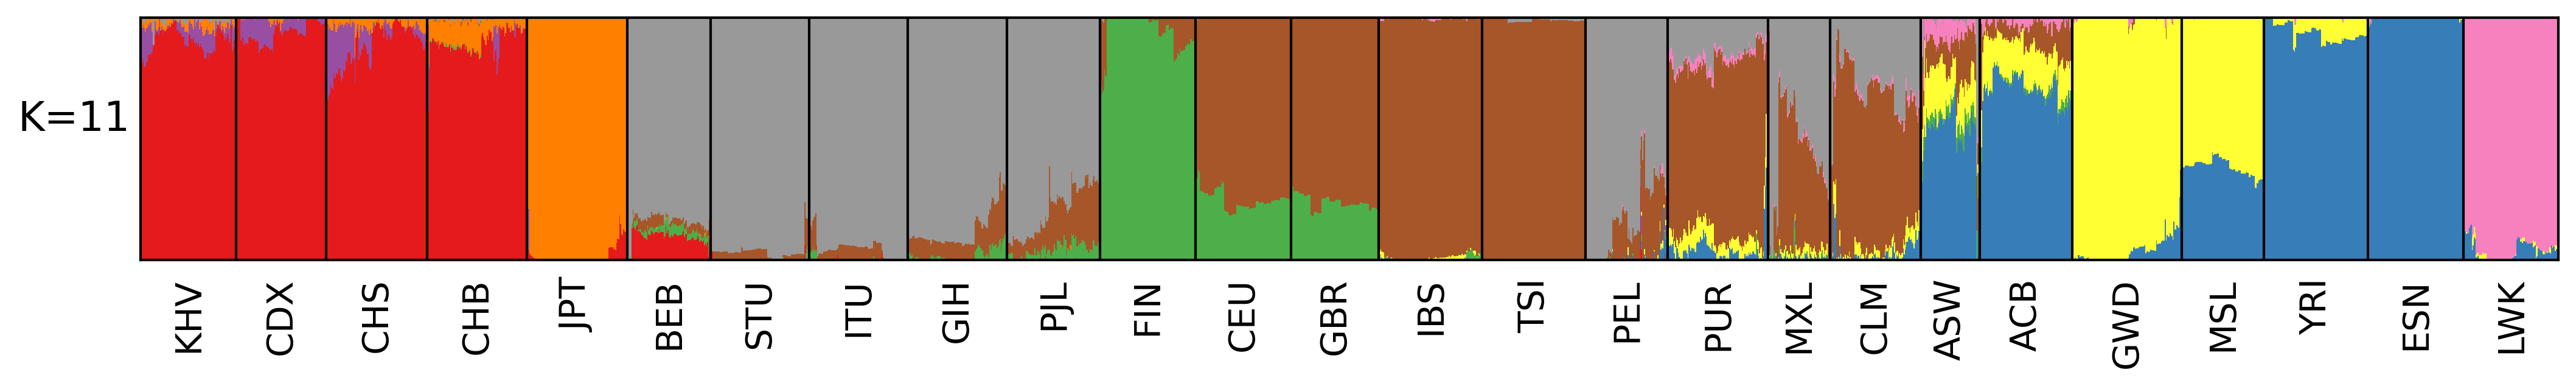

In [4]:
from geneview import admixtureplot
pop_group_1kg = ["KHV", "CDX", "CHS", "CHB", "JPT", "BEB", "STU", "ITU", "GIH", "PJL", "FIN", 
                 "CEU", "GBR", "IBS", "TSI", "PEL", "PUR", "MXL", "CLM", "ASW", "ACB", "GWD", 
                 "MSL", "YRI", "ESN", "LWK"]

df = pd.read_table("../../examples/data/admixture.output.Q", sep=" ", header=None)
sample_info = pd.read_table("../../examples/data/admixture_population.info", sep="\t", header=None, names=["Group"])
popset = set(sample_info["Group"])

data = {}
for g in popset:
    g_data = df[sample_info["Group"]==g].copy()
    # Sub sampling: keep less than 140 samples for each group
    data[g] = g_data.sample(n=140, random_state=100) if len(g_data)>140 else g_data


### Plot
params = {"legend.fontsize": 14,
          "axes.labelsize": 16,
          "xtick.labelsize": 14,
          "ytick.labelsize": 14}
plt.rcParams.update(params)
f, ax = plt.subplots(1, 1, figsize=(14, 2), facecolor="w", constrained_layout=True, dpi=300)
TAB10 = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
_ = admixtureplot(data=data, 
                  group_order=pop_group_1kg, # pop_group_bigcs+pop_group_1kg,
                  palette="Set1", #"viridis",
                  xticklabel_kws={"rotation": "vertical"},
                  ylabel="K=11", ylabel_kws={"rotation": 0, "ha": "right"},
                  ax=ax)
